## Face Detection with Haar Cascades

In [37]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

## Images

In [38]:
model = cv2.imread('image_01.png',0)
withglass = cv2.imread('image_02.png',0)
group = cv2.imread('image_03.png',0)
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

In [39]:
plt.subplot(1, 3, 1)
plt.imshow(cv2.resize(model,(1000,1000)), cmap='gray') 
plt.title('without glass')
plt.axis('on')

(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

In [40]:
plt.subplot(1, 3, 2)
plt.imshow(cv2.resize(withglass,(1000,1000)), cmap='gray')
plt.title('withglass')
plt.axis('on')

(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

In [41]:
plt.subplot(1, 3, 3)
plt.imshow(cv2.resize(group,(1000,1000)), cmap='gray')
plt.title('group')
plt.axis('on')

(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

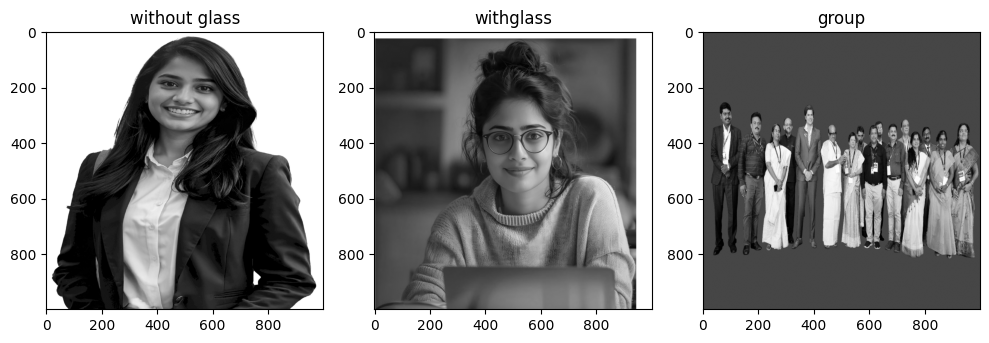

In [42]:
plt.tight_layout()
plt.show()

## Cascade Files

OpenCV comes with these pre-trained cascade files, we've relocated the .xml files for you in our own DATA folder.

## Face Detection

In [43]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [44]:
def detect_face(img):
    
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

In [45]:
result = detect_face(withglass)

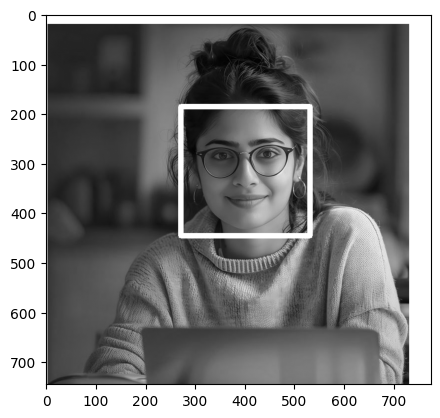

In [46]:
plt.imshow(result,cmap='gray')
plt.show()

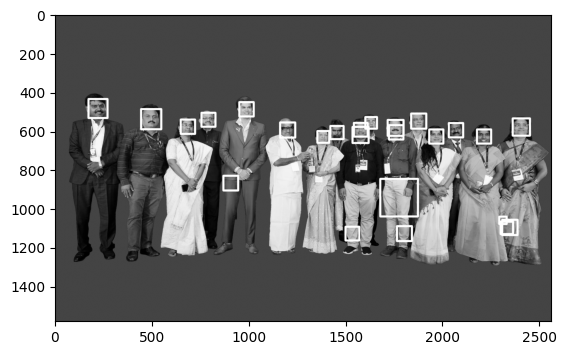

In [47]:
result = detect_face(group)
plt.imshow(result,cmap='gray')
plt.show()

In [12]:
def adj_detect_face(img):
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

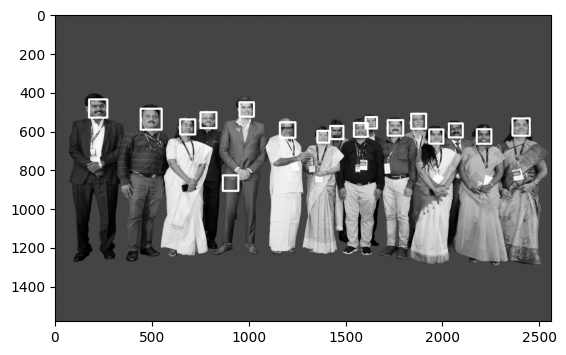

In [13]:
result = adj_detect_face(group)
plt.imshow(result,cmap='gray')
plt.show()

## Eye Cascade File

In [14]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [55]:
def detect_eyes(img):
    # Convert to grayscale only if not already
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img.copy()
    
    face_img = gray.copy()
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=6, minSize=(150, 150))

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = face_img[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(
            roi_gray,
            scaleFactor=1.1,
            minNeighbors=15,
            minSize=(40, 40)
        )

        for (ex, ey, ew, eh) in eyes:
            if ey + eh/2 > h/2:   # ignore detections below the mid-face
                continue
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 255, 255), 3)

    return face_img


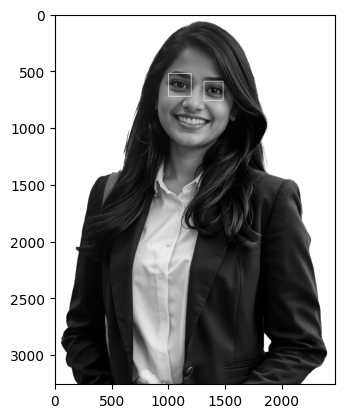

In [56]:
model = cv2.imread("image_01.png")
result = detect_eyes(model)
plt.imshow(result, cmap='gray')
plt.show()

In [57]:
eyes = eye_cascade.detectMultiScale(withglass) 


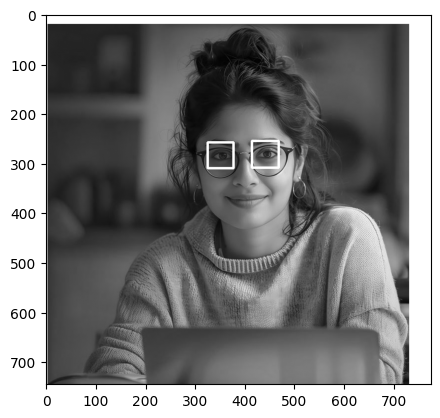

In [58]:
result = detect_eyes(withglass)
plt.imshow(result,cmap='gray')
plt.show()

## Conjunction with Video

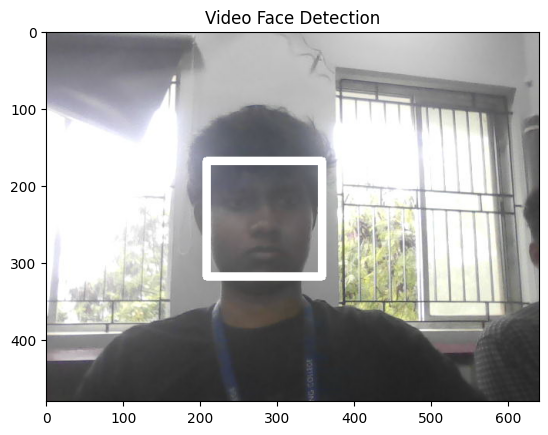

In [ ]:
cap = cv2.VideoCapture(0)

plt.ion()
fig, ax = plt.subplots()

ret, frame = cap.read(0)
frame = detect_face(frame)
im = ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title('Video Face Detection')

while True:
    ret, frame = cap.read(0)

    frame = detect_face(frame)

    im.set_data(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.pause(0.10)

   

cap.release()
plt.close()
